#imports

# New Section

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
real=pd.read_csv('True.csv')
fake=pd.read_csv('Fake.csv')

In [ ]:
# dropping rows that have urls as text and date, real's dates look fine, also dropping ones that have no text
fake_drop = fake.drop(index=[9358,15507,15508,18933])
fake_drop = fake_drop.drop(fake_drop.loc[fake_drop.text == ' '].index)
real_drop = real.drop(real.loc[real.text == ' '].index)

In [ ]:
real_drop.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
# Give labels to data before combining
fake_drop['fake'] = 1
real['fake'] = 0

In [ ]:
combined = pd.concat([fake_drop, real])

In [ ]:
## train/test split the text data and labels
features = combined['text']
labels = combined['fake']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [ ]:
## not removing stop words to maintain word context
max_words = 2000
max_len = 400

token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train.values)
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [ ]:
embed_dim = 50
lstm_out = 64
batch_size = 32

model = Sequential()
model.add(Embedding(max_words, embed_dim, input_length = max_len))
model.add(LSTM(lstm_out))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, name='out_layer'))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           100000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0

In [ ]:
history = model.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs = 5, validation_split=0.2)

Epoch 1/5
830/830 [==============================] - 17s 21ms/step - loss: 0.1051 - accuracy: 0.9609 - val_loss: 0.0513 - val_accuracy: 0.9877
Epoch 2/5
830/830 [==============================] - 16s 20ms/step - loss: 0.0430 - accuracy: 0.9886 - val_loss: 0.0449 - val_accuracy: 0.9875
Epoch 3/5
830/830 [==============================] - 17s 20ms/step - loss: 0.0839 - accuracy: 0.9707 - val_loss: 0.0413 - val_accuracy: 0.9881
Epoch 4/5
830/830 [==============================] - 16s 20ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0967 - val_accuracy: 0.9684
Epoch 5/5
830/830 [==============================] - 17s 20ms/step - loss: 0.0359 - accuracy: 0.9911 - val_loss: 0.0644 - val_accuracy: 0.9756


In [ ]:
# now compare to test values
test_sequences = token.texts_to_sequences(X_test)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len)

In [ ]:
model.evaluate(test_sequences_padded, y_test)

346/346 [==============================] - 3s 8ms/step - loss: 0.0641 - accuracy: 0.9774


[0.06408517807722092, 0.9774103164672852]

([<matplotlib.axis.XTick at 0x7fdb304cc208>,
 <a list of 5 Text major ticklabel objects>)

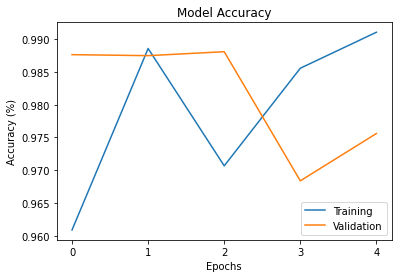

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x7fdb30521f60>,
 <a list of 5 Text major ticklabel objects>)

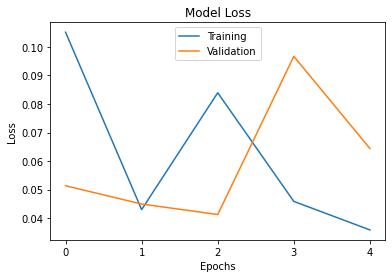

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])
